## Homework Assignment 4 -- Due April 1st at 10am.

This assignment primarily concerns the material in notebooks **8, 12, 13** and the associated labs.

Save your completed homework file in your repository, as **mp248/Assignment.4/Assignment.4.ipynb**.

Ensure you do **not** copy any of the weather data (.csv files) or crime data (the big .jeojson file) into your personal repo.  If such files are discovered in your repo you will lose one point on this assignment.

The pre-grading script will start grading by Saturday March 23rd, uploading feedback to **Task 8**. See the relevant CourseSpaces thread for details on what the pre-grading script is looking for.

In your labs **March 25th--29th** we will ask you to move all the code you need from notebooks **8, 12, 13** and the relevant labs into a library that you will import into this notebook, i.e. we ask you to minimize (in this notebook) the amount of recycled code from class and previous labs, to make your work easier to grade.

* * *

## P1: Weather data

Load the common weather data for the four cities as we did in **Lecture Notebook 12**.  

a) For each city, and each month, compute the average of: daily max, min and mean temperatures for that month.  In more concrete detail: for Edmonton January max temperatures, you would take the average of all the maximum temperatures for every day in January, for all years in which we have data, for the city of Edmonton.  You would do the same for every month, and all three temperature readings (daily max, min, mean).  Output your answer as four $12 \times 3$ numpy matrices. 

b) For every city, and every weather reading (daily max, min, mean), find the weather record where that daily temperature recording differs from the monthly average by the largest amount. i.e. your answer to part (b) will consist of **12** weather records. Please format your answer so that you have your **12=4*3** answers on one line each. For example, one line would be:

    Edmonton, Mean Temp (°C), avg: AVG, Temp: TMP, Dev: DEV, Date: YYYY-MM-DD
    
This would be the answer for Edmonton's Mean temperature readings.  YYYY-MM-DD would be the date of the maximum deviation from the average of all temperatures in the month MM.  TMP is the temperature reading on that day (in this case, the daily mean temp).  AVG is the average of the temperature readings for month MM.  DEV is the difference between TMP and AVG, i.e. DEV = TMP-AVG. 

In [1]:
## from Lecuture notebook 12

## Let's import our code from Lecture 8 (Simple Stats) and Lab 8.
## we'll modify it a little bit so it can grab the weather data from
## multiple directories.

import datetime as dt
import os as os
from operator import itemgetter
import collections as co
import fnmatch as fn    ## library for finding files using OS wildcards
import numpy as np

print("Python current working directory:", os.getcwd())

## directories containing the weather w.* subdirectories
sdp = ['data/L8.data'] #, './data']
sdp.append('data')

## Build the list of directories of the weather files.
wsubdirs = sum( [[x+'/'+y for y in fn.filter(os.listdir(x), "w.*")] for x in sdp], [] )

print("Relative location of weather .csv files: ", wsubdirs)

Python current working directory: /home/user/mp248/Assignment.4
Relative location of weather .csv files:  ['data/L8.data/w.cal', 'data/L8.data/w.edm', 'data/w.sask', 'data/w.vic']


In [2]:
## basic line formatting. This is used in the next code block.
## Code removes quotes and newlines, and splits along commas.
def fmtline(ln):
    PL = ln.translate({ord(c): None for c in '"\n'})
    PL = PL.split(",")
    return(PL)

In [3]:
## we will store the file data in a co.defaultdict(dict)
## format initDat["location"][date][dict key such as max temp, min temp, etc.] 

initDat = co.defaultdict(dict)

for wd in wsubdirs:
    files = fn.filter(os.listdir(wd), "eng-daily*.csv")
    for wdf in files:
        with open(wd+'/'+wdf, encoding='utf-8') as f:
            content = f.readlines()
            
            ## find line describing columns
            keylines = [i for i in range(len(content)) if 'date/time' in\
                        content[i].lower()]
            if len(keylines)!=1:
                print("Error: "+wd+'/'+wdf+" key error. ")
                () = () + 1
            
            ## find station data
            stnlines = [i for i in range(len(content)) if 'station name' in\
                        content[i].lower()]
            if len(stnlines)!=1:
                print("Error: "+wd+'/'+wdf+" stn name error. ")
                () = () + 1
                
            airpt = fmtline(content[stnlines[0]])[1]
            keys = fmtline(content[keylines[0]])
            ## get date/time index
            dti = [j for j in range(len(keys)) if 'date/time' in\
                   keys[j].lower()]
            if len(dti)!=1:
                print("Error: "+wd+'/'+wdf+' date/time idx. ')
                () = () + 1
            
            ## let's collect the data
            for i in range(keylines[0]+1, len(content)):
                ln = fmtline(content[i])
                ## convert date/time to python datetime object
                ln[dti[0]] = dt.datetime.strptime(ln[dti[0]], "%Y-%m-%d")
                
                initDat[airpt][ln[dti[0]]] = dict( [ (keys[j] , ln[j]) for j in\
                                                    range(len(keys)) if j != dti[0] ] ) 
                

In [4]:
## date gap check for initDat, i.e. report what (if any) days have missing weather data.
for A in initDat.keys():
    print("Airport: ", A, ' ', end='')
    sd = sorted( initDat[A].keys() )
    print('First date: ',sd[0].date(), 'Final date: ', sd[-1].date())
    ID = sd[0]
    mD = []
    while ID<sd[-1]:
        ID += dt.timedelta(days=1)
        if ID not in initDat[A].keys():
            mD.append(ID)
    if (len(mD)>0):
        print("Missing dates: ", mD)
    else:
        print(sd[-1].date()-sd[0].date())
        
## list of keys we will have use for.
ncl = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',\
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)']

## let's make sure all the max, min, mean, total rain, total snow, total precip floats are present
for A in initDat.keys():
    for k in ncl:
        am = 0
        for d in initDat[A].keys():
            if len(initDat[A][d][k])==0:
                am += 1
        ## OMITTED THIS TO LOWER THE AMOUNT OF PRINTING THAT HAPPENS
        #print('Airport: ', A, 'missing ', k, ' count ', am)
        

Airport:  CALGARY INTL A  First date:  2014-01-01 Final date:  2018-12-31
1825 days, 0:00:00
Airport:  EDMONTON INTL A  First date:  2014-01-01 Final date:  2018-12-31
1825 days, 0:00:00
Airport:  SASKATOON DIEFENBAKER INT'L A  First date:  1970-01-01 Final date:  2012-12-31
15705 days, 0:00:00
Airport:  SASKATOON RCS  First date:  2013-01-01 Final date:  2017-12-31
1825 days, 0:00:00
Airport:  SASKATOON INTL A  First date:  2018-01-01 Final date:  2018-12-31
364 days, 0:00:00
Airport:  VICTORIA INT'L A  First date:  1970-01-01 Final date:  2012-12-31
15705 days, 0:00:00
Airport:  VICTORIA INTL A  First date:  2013-01-01 Final date:  2018-12-31
2190 days, 0:00:00


In [5]:
## merge dictionaries for the four cities

## NOTE: FOR SOME REASON THIS FUNCTION DOES NOT WORK UNLESS THE KERNEL IS RESTARTED AND RUN

edmdict = dict()
caldict = dict()
vicdict = dict()
sasdict = dict()
for k in initDat.keys():
    if 'EDM' in k:
        edmdict.update(initDat[k])
    if 'CAL' in k:
        caldict.update(initDat[k])
    if 'VIC' in k:
        vicdict.update(initDat[k])
    if 'SASK' in k:
        sasdict.update(initDat[k])
        
dictL = [edmdict, caldict, vicdict, sasdict]
dictN = ["Edmonton", "Calgary", "Victoria", "Saskatoon"]

## Let's find a list of common dates where we have weather data for all cities. 
dtlists = [set(k for k,d in D.items() if len(d[ncl[0]])!=0\
               and len(d[ncl[1]])!=0 and len(d[ncl[2]])!=0) for D in dictL]

## intersection of all the sets
## this is a set of dates where all the cities have max, min and mean temps
comdt = set.intersection(*dtlists)
## sort the dates.
coml = sorted(comdt)

In [6]:
## for all the cities, and all the common dates, 
## we convert all the measured termperature and precipitation
## items to floats. Here we add the (not too bad) assumption that if precipitation
## is not listed, it should be zero.

for D in dictL:
    for x in coml:
        for k in range(len(ncl)):
            if len(D[x][ncl[k]])==0:
                D[x][ncl[k]]=0.0
            else:
                D[x][ncl[k]]=float(D[x][ncl[k]])
           

### My Code

notes:<br>
ncl[0] = Max temp<br>
ncl[1] = min temp<br>
ncl[2] = mean temp <br>
ncl[3] = total rain (mm) <br>
ncl[4] = total snow (cm) <br>
ncl[5] = total precip (mm)<br>

In [7]:
qualityList = ['Max Temp','Min Temp','Mean Temp','Total Rain', 'Total Snow','Total Precip']
#print(qualityList)
averageMatrix = np.zeros((12,3))
lengthMatrix = np.zeros((12,3)) 
#print(averageMatrix)

for i in range (0,len(dictL)):
    location = dictL[i]
    averageMatrix = np.zeros((12,3))
    lengthMatrix = np.zeros((12,3)) 
    for quality in range (0,3):
        sum = 0
        for x in coml:
            k = str(x)
            month = int(k[5]+k[6])
            averageMatrix[month-1][quality] = averageMatrix[month-1][quality]+location[x][ncl[quality]]
            lengthMatrix[month-1][quality] = lengthMatrix[month-1][quality] + 1
    #print(dictN[i])
    for s in range (0,12):
        for a in range (0,3):
            averageMatrix[s][a] = averageMatrix[s][a]/lengthMatrix[s][a]
    #print(qualityList[0:3])
    #print(averageMatrix)
    if(dictN[i]=='Edmonton'):
        averageMatrixEdm = averageMatrix
    if(dictN[i]=='Calgary'):
        averageMatrixCalg = averageMatrix
    if(dictN[i]=='Victoria'):
        averageMatrixVic = averageMatrix
    if(dictN[i]=='Saskatoon'):
        averageMatrixSask = averageMatrix
print('Edmonton')
print(averageMatrixEdm)
print('Calgary')
print(averageMatrixCalg)
print('Victoria')
print(averageMatrixVic)
print('Saskatoon')
print(averageMatrixSask)

Edmonton
[[ -4.27786885 -15.48442623  -9.90081967]
 [ -4.68108108 -15.72522523 -10.22342342]
 [  1.77903226  -9.32096774  -3.77822581]
 [ 10.85916667  -2.90833333   3.9925    ]
 [ 17.98205128   1.84700855   9.93589744]
 [ 21.82931034   7.31206897  14.59310345]
 [ 24.02786885   9.77786885  16.92868852]
 [ 23.15619835   7.53471074  15.37024793]
 [ 17.62564103   2.63247863  10.15641026]
 [ 10.8982906   -2.22222222   4.35042735]
 [ -0.03472222 -10.12152778  -5.09236111]
 [ -4.90866667 -15.40466667 -10.178     ]]
Calgary
[[  0.89836066 -10.0852459   -4.60163934]
 [ -0.11261261 -10.72882883  -5.42432432]
 [  5.02822581  -6.46532258  -0.71129032]
 [ 12.555       -0.59916667   5.99916667]
 [ 17.10683761   3.6974359   10.42820513]
 [ 21.4612069    8.97758621  15.24310345]
 [ 25.02540984  11.47868852  18.27459016]
 [ 23.31652893  10.26859504  16.81487603]
 [ 17.85299145   5.23333333  11.56410256]
 [ 12.4965812    0.33162393   6.43504274]
 [  3.98611111  -6.98819444  -1.50555556]
 [ -0.78466667 -

b) For every city, and every weather reading (daily max, min, mean), find the weather record where that daily temperature recording differs from the monthly average by the largest amount. i.e. your answer to part (b) will consist of **12** weather records. Please format your answer so that you have your **12=4*3** answers on one line each. For example, one line would be:

    Edmonton, Mean Temp (°C), avg: AVG, Temp: TMP, Dev: DEV, Date: YYYY-MM-DD
    
This would be the answer for Edmonton's Mean temperature readings.  YYYY-MM-DD would be the date of the maximum deviation from the average of all temperatures in the month MM.  TMP is the temperature reading on that day (in this case, the daily mean temp).  AVG is the average of the temperature readings for month MM.  DEV is the difference between TMP and AVG, i.e. DEV = TMP-AVG. 

In [8]:
combinedAvgMatrix = [averageMatrixEdm,averageMatrixCalg,averageMatrixVic,averageMatrixSask]
for i in range (0,len(dictL)):
    location = dictL[i]
    for quality in range (0,3):
        maxDif = 0
        date = 0
        temp = 0
        for x in coml:
            k = str(x)
            month = int(k[5]+k[6])
            temp = location[x][ncl[quality]]
            avgtemp = combinedAvgMatrix[i][month-1][quality]
            dif = abs(temp-avgtemp)
            if dif>maxDif:
                maxDif = dif
                date = x
                tempurature = temp
                Average = avgtemp
        print(dictN[i],',', qualityList[quality],', avg: ',Average,', Temp:',tempurature,', Dev: ',maxDif,',Date:',str(date)[0:10])
                
                
            
            

Edmonton , Max Temp , avg:  1.7790322580645161 , Temp: -24.5 , Dev:  26.279032258064515 ,Date: 2014-03-01
Edmonton , Min Temp , avg:  -9.320967741935487 , Temp: -39.0 , Dev:  29.679032258064513 ,Date: 2014-03-01
Edmonton , Mean Temp , avg:  -3.7782258064516143 , Temp: -31.8 , Dev:  28.021774193548385 ,Date: 2014-03-01
Calgary , Max Temp , avg:  5.028225806451611 , Temp: -25.4 , Dev:  30.42822580645161 ,Date: 2014-03-01
Calgary , Min Temp , avg:  -6.4653225806451635 , Temp: -30.4 , Dev:  23.934677419354834 ,Date: 2014-03-01
Calgary , Mean Temp , avg:  -0.7112903225806454 , Temp: -27.9 , Dev:  27.188709677419354 ,Date: 2014-03-01
Victoria , Max Temp , avg:  19.69059829059829 , Temp: 31.2 , Dev:  11.509401709401708 ,Date: 2017-09-04
Victoria , Min Temp , avg:  3.4423611111111128 , Temp: -6.5 , Dev:  9.942361111111113 ,Date: 2014-11-30
Victoria , Mean Temp , avg:  6.878472222222224 , Temp: -2.7 , Dev:  9.578472222222224 ,Date: 2014-11-30
Saskatoon , Max Temp , avg:  0.26774193548387115 , T

## P2: Crime data

Which crimes (use **parent_incident_type**) are more common in proximitiy to The Bay Centre, and which are more common far from the Bay Centre?  Start your analysis with a histogram using the distance function as in **Lab 13.b** problem 3. I suggest starting your analysis using bin endpoints that are integer multiples of $500m$.

Please put any further analysis (by crime) in a text field in your plot.  After your histograms, list the **parent_incident_types** by their from *most commonly* to *least commonly* happening in the vicinity of the Bay Centre.

In [9]:
## This method changes the current working directory to the

import json
import os

print(os.getcwd())
os.chdir("/home/user/")
os.chdir('mp248-course-notes/data')
print(os.listdir('.'))

## please load the data from the mp248-course-notes repository.
## It is a large file.  i.e. : Please **DO NOT** store in your personal repo, i.e.
## please do not copy this file, nor move this file.

## the code below should execute in your notebook -- if not, modify the directory
## accordingly.

with open("Victoria (BC) Police Department.geojson") as f:
    data = json.loads(f.read())
    

os.chdir("/home/user/mp248/Assignment.4")
print('working directory is back to being ',os.getcwd())
print(os.listdir('.'))

/home/user/mp248/Assignment.4
['w.sask', '20Msun-surfacedata.ipynb', 'w.vic', 'M20star-surface.dat', 'iniab1.4E-02As09.ppn', 'Victoria (BC) Police Department.geojson']
working directory is back to being  /home/user/mp248/Assignment.4
['data', 'F.Q1.Context.png', '.ipynb_checkpoints', 'Assignment.4.ipynb']


In [10]:
clean_dat = list()
incompl_dat = list()

for x in data['features']:
    if 'properties' not in x.keys():
        continue ## why bother?

    ## we have the properties, so let's start building the record.
    newRec = dict()
    incFlag = False # set to true if we discover missing data in x
    
    floatkeys = ['latitude', 'longitude']
    strkeys = ['parent_incident_type', 'incident_type_primary', 'address_1', 'address_2']
    intkeys = ['case_number', 'incident_id']
    datekeys = ['created_at', 'updated_at', 'incident_datetime']
    
    for k in floatkeys:
        if k in x['properties'].keys() and isinstance(x['properties'][k], str) and\
        len(x['properties'][k])>0:
            newRec[k] = float(x['properties'][k])
        else:
            incFlag=True

    ## anything to check?
    for k in strkeys:
        newRec[k] = x['properties'][k]
        
    for k in intkeys:
        ## let's count non-numerical characters
        non_ch_chars = []
        digits = '0123456789'
        for ch in x['properties'][k]:
            if ch not in digits:
                non_ch_chars.append(ch)

        for ch in non_ch_chars:
            if ch != '-':
                x['properties'][k] = x['properties'][k].replace(ch, '-')
            
        if '-' in x['properties'][k]:
            newRec[k] = [int(w) for w in x['properties'][k].split('-')]
        else:
            newRec[k] = int(x['properties'][k])
            
    for k in datekeys:
        ## typical format: '2014-12-06T21:59:00.000'
        newRec[k] = dt.datetime.strptime(x['properties'][k], '%Y-%m-%dT%H:%M:%S.000')
        
    if incFlag:
        incompl_dat.append(newRec)
    else:
        clean_dat.append(newRec)
        
## Let's use the results from the lab earlier this week to fix or purge the clearly bad data from
## clean_dat...

bad_idx = []

for i in range(len(clean_dat)):
    x = clean_dat[i]
    if x['latitude']>48.655 or x['latitude']<48:
        bad_idx.append(i)
        continue
    if x['longitude']<-124 or x['longitude']>-123:
        bad_idx.append(i)
        continue
    if x['incident_datetime'] > x['created_at']:
        bad_idx.append(i)
        continue
    if x['updated_at'] < x['created_at']:
        bad_idx.append(i)
        
clean_dat = [clean_dat[i] for i in range(len(clean_dat)) if i not in bad_idx]

In [11]:
## using the haversine formula to calculate the great circle distance between two points
## from https://www.movable-type.co.uk/scripts/latlong.html

import math

def findDist(lat1,lon1,lat2,lon2):
    R = 6371e3; ## metres
    psi1 = lat1*0.0174533 ## converting to radians
    psi2 = lat2*0.0174533 ## converting to radians
    deltaThi = (lat2-lat1)*0.0174533 ## converting to radians
    deltaLambda = (lon2-lon1)*0.0174533 ## converting to radians
    a = math.sin(deltaThi/2)*math.sin(deltaThi/2)+math.cos(psi1)*math.cos(psi2)*math.sin(deltaLambda/2)*math.sin(deltaLambda/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = abs(R*c)
    return d

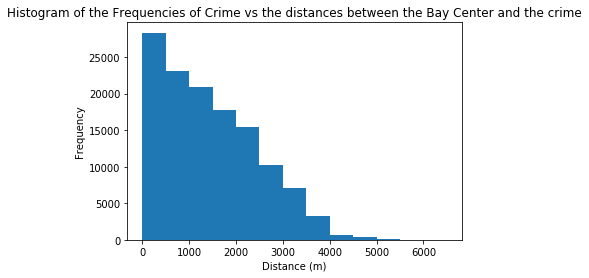

In [24]:
## 48.4251429,-123.366534 is the coordinates of the Bay Center
import matplotlib.pyplot as plt

latBay = 48.4251429
longBay = -123.366534
distList = []
crimeInVicinity = []
for i in range(0,len(clean_dat)):
    x = clean_dat[i]
    lat2 = x['latitude']
    long2 = x['longitude']
    dist = findDist(latBay,longBay,lat2,long2)
    distList.append(dist)
    if dist <= 1000:
        crimeInVicinity.append(x)
    #print(distList[-1])
plt.hist(distList, bins=range(0,7000,500))
plt.title('Histogram of the Frequencies of Crime vs the distances between the Bay Center and the crime')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.show()
    

## P3: Crime and Weather data

This problem asks you to compare the Victoria PD Traffic Collision data, on *typical* days vs. on days when it *snows*, also accidents near *hills*.

(a) For how many days do we have both crime data (from **Notebook 13**) and weather data (see **Notebook 8**) for Victoria? **Comment:** Regarding Notebook 8, please use the dates from the **coml** variable. For how many of our crime records do we have weather data?

(b) Compute the average number of **COLLISION** records (under **Traffic** -- see the **ctree** variable from Notebook 13) per day (on all days) vs. the average number on days where it snowed.

(c) Repeat (b) but where you restrict yourself to car crashes near major hills in town.  Let's say the major hills are (1) near Trafalgar Park, (2) the corner of Burdett and Blanshard, and (3) one hill of your choice.  Find the GPS coordinates of these locations using Google Maps, and restrict yourself to accidents within a **200m** radius of those coordinates.


## P4: Quiz.3 revisited

Let's revisit **Quiz 3**.  Write a Python function

**collisionPlot(va,vb,ma,mb)**

that not only counts all the collisions between the billiards and the wall, but it also plots them.  i.e. the output of **collisionPlot** will be a matplotlib figure similar to

<img src="F.Q1.Context.png">

i.e. it will show the paths of the billiards.  Thus to solve this problem you will need to compute both the collision times and their locations; not just the velocity sequence.

Include the plots for **va=0, vb=-1, ma=1, mb=10, 100**.  Set your figsize to **(8,8)** so that the plots are reasonably-large.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def collisionPlot(va,vb,ma,mb):
    initvela = va
    initvelb = vb
    initposA = 1
    initposB = 2
    posA = [initposA]
    posB = [initposB]
    t = [0]
    c1 = 0
    c2 = 0
    dt = .001
    
    if (vb<0):
        while posA[-1]<posB[-1]:
            posA.append(posA[-1] + va*dt)
            posB.append(posB[-1] + vb*dt)
            t.append(t[-1]+dt)
        c2 = c2 + 1
        #print('c2 at',posA[-1],posB[-1])
        vaorig = va
        vborig = vb
        va = (1/(ma+mb))*((ma-mb)*vaorig + 2*mb*vborig)
        vb = (1/(ma+mb))*((mb-ma)*vborig + 2*ma*vaorig)
        
    while vb<va or va<0:
        posA.append(posA[-1] + va*dt)
        posB.append(posB[-1] + vb*dt)
        t.append(t[-1]+dt)
        if(posA[-1] <= 0):
            #print('c1 at',posA[-1],posB[-1])
            c1 = c1+1
            va = -va
        if(posA[-1]>=posB[-1]):
            #print('c2 at',posA[-1],posB[-1])
            c2 = c2+1
            vaorig = va
            vborig = vb
            va = (1/(ma+mb))*((ma-mb)*vaorig + 2*mb*vborig)
            vb = (1/(ma+mb))*((mb-ma)*vborig + 2*ma*vaorig)
            #print('va,vb ->',va,vb)
    plt.figure(figsize=(8,8))
    plt.plot(posA,t, label = 'Ball A')
    plt.plot(posB,t, label = 'Ball B')
    plt.title('plot of time vs position for two balls of mass for masses: '+str(ma)+' and '+str(mb))
    plt.xlabel('Position')
    plt.ylabel('Time')
    plt.legend()
    plt.show()
    print(initvela,initvelb,ma,mb,c1,c2)
    return initvela,initvelb,ma,mb,c1,c2

collisionPlot(0,-1,1,10)
collisionPlot(0,-1,1,100)